<a href="https://colab.research.google.com/github/JohnPaul1278/ps4/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('classic')

I'm going to start by trying to use the FRED API. It seems like a useful and fairly easy tool. I'm going to look at "employment level" to begin.

In [5]:
start = datetime.datetime (1948, 1, 1)
end = datetime.datetime (2023, 10, 1)
df = pdr.DataReader('LNU02000000', 'fred', start, end) #the code for 'employment level' is LNU02000000. The data goes from 1948 to 2023, so for now I'm using those dates.
#the unit here is "thousands of persons" and the data is not seasonally adjusted.
df


,LNU02000000
DATE,
1948-01-01,56339
1948-02-01,56440
1948-03-01,56601
1948-04-01,57471
1948-05-01,57763
...,...
2023-06-01,161559
2023-07-01,161982
2023-08-01,161427


<Axes: xlabel='DATE'>

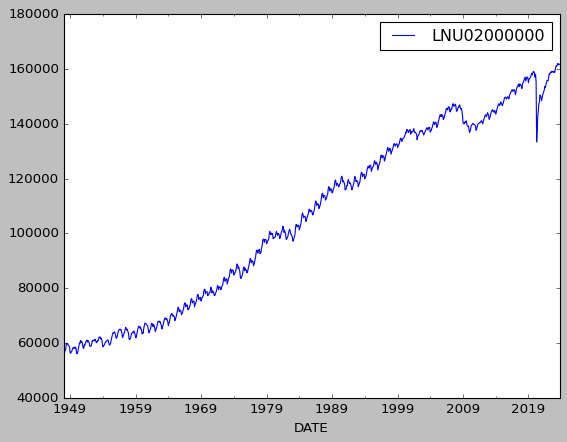

In [6]:
df.plot() #not too shocking here. The population has been increasing, so we would expect jobs to increase as well. Interesting dip in 2020. No doubt due to COVID.
#we can see that despite the dip in 2020, things appear to have returned to their former trajectory.

Now for something more interesting: let's see how the number of people who primarily work full time compares to those who primarily work part time.

<Axes: xlabel='DATE'>

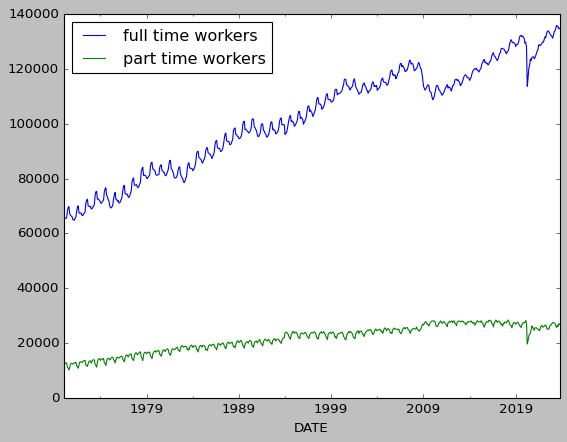

In [8]:
start = datetime.datetime (1970, 1, 1) #I looked at a shorter range at first, but it was harder to identify trends.
end = datetime.datetime (2023, 10, 1)

df = pdr.DataReader(['LNU02500000', 'LNU02600000'],
                    'fred', start, end)
df=df.rename(columns={"LNU02500000": "full time workers", "LNU02600000": "part time workers"}) #our unit of measurement once again is "thousands of persons" and is not seasonally adjusted

df.plot()

VERY interesting stuff. The COVID pandemic corresponded with a dip in both full time employment and part time employment, but part time jobs actually saw a relative jump after full time employment dropped in 2008. Full time jobs have generally been rising steadily for the last half century, with part time jobs representing a steady minority that increases at a slower rate. The fact that full time jobs decreased during the recession while part time jobs increased makes sense to me. Stable employment was harder to come by back then. I remember my father had to take on multiple part time jobs despite his Ph.D because there was a shortage of full time positions.